In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C3_bot_detection_data.csv")
df

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [4]:
df=df.dropna()

In [6]:
df.isnull().sum()

User ID           0
Username          0
Tweet             0
Retweet Count     0
Mention Count     0
Follower Count    0
Verified          0
Bot Label         0
Location          0
Created At        0
Hashtags          0
dtype: int64

In [7]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000
mean,548640.613097,49.950911,2.515207,4990.867928,0.500204
std,259990.806985,29.195286,1.709249,2880.947193,0.500006
min,100025.000000,0.000000,0.000000,0.000000,0.000000
25%,321829.500000,25.000000,1.000000,2493.500000,0.000000
50%,548396.000000,50.000000,3.000000,4997.000000,1.000000
75%,772751.500000,75.000000,4.000000,7475.500000,1.000000
max,999995.000000,100.000000,5.000000,10000.000000,1.000000


In [9]:
df["Bot Label"].value_counts()

1    20838
0    20821
Name: Bot Label, dtype: int64

In [12]:
df1=df[['User ID','Retweet Count','Mention Count','Follower Count','Bot Label']]

In [13]:
x=df1.drop('Bot Label',axis=1)
y=df1['Bot Label']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [18]:
grid_search.best_score_

0.5091387555577382

In [19]:
rfc_best=grid_search.best_estimator_

[Text(2232.0, 1902.6000000000001, 'Mention Count <= 4.5\ngini = 0.5\nsamples = 18420\nvalue = [14587, 14574]\nclass = Yes'),
 Text(1116.0, 1359.0, 'Retweet Count <= 97.5\ngini = 0.5\nsamples = 15313\nvalue = [11993, 12240]\nclass = No'),
 Text(558.0, 815.4000000000001, 'Retweet Count <= 96.5\ngini = 0.5\nsamples = 14876\nvalue = [11671, 11852]\nclass = No'),
 Text(279.0, 271.79999999999995, 'gini = 0.5\nsamples = 14709\nvalue = [11507, 11743]\nclass = No'),
 Text(837.0, 271.79999999999995, 'gini = 0.48\nsamples = 167\nvalue = [164, 109]\nclass = Yes'),
 Text(1674.0, 815.4000000000001, 'Retweet Count <= 99.5\ngini = 0.496\nsamples = 437\nvalue = [322, 388]\nclass = No'),
 Text(1395.0, 271.79999999999995, 'gini = 0.487\nsamples = 291\nvalue = [193, 267]\nclass = No'),
 Text(1953.0, 271.79999999999995, 'gini = 0.499\nsamples = 146\nvalue = [129, 121]\nclass = Yes'),
 Text(3348.0, 1359.0, 'Follower Count <= 7852.0\ngini = 0.499\nsamples = 3107\nvalue = [2594, 2334]\nclass = Yes'),
 Text(27

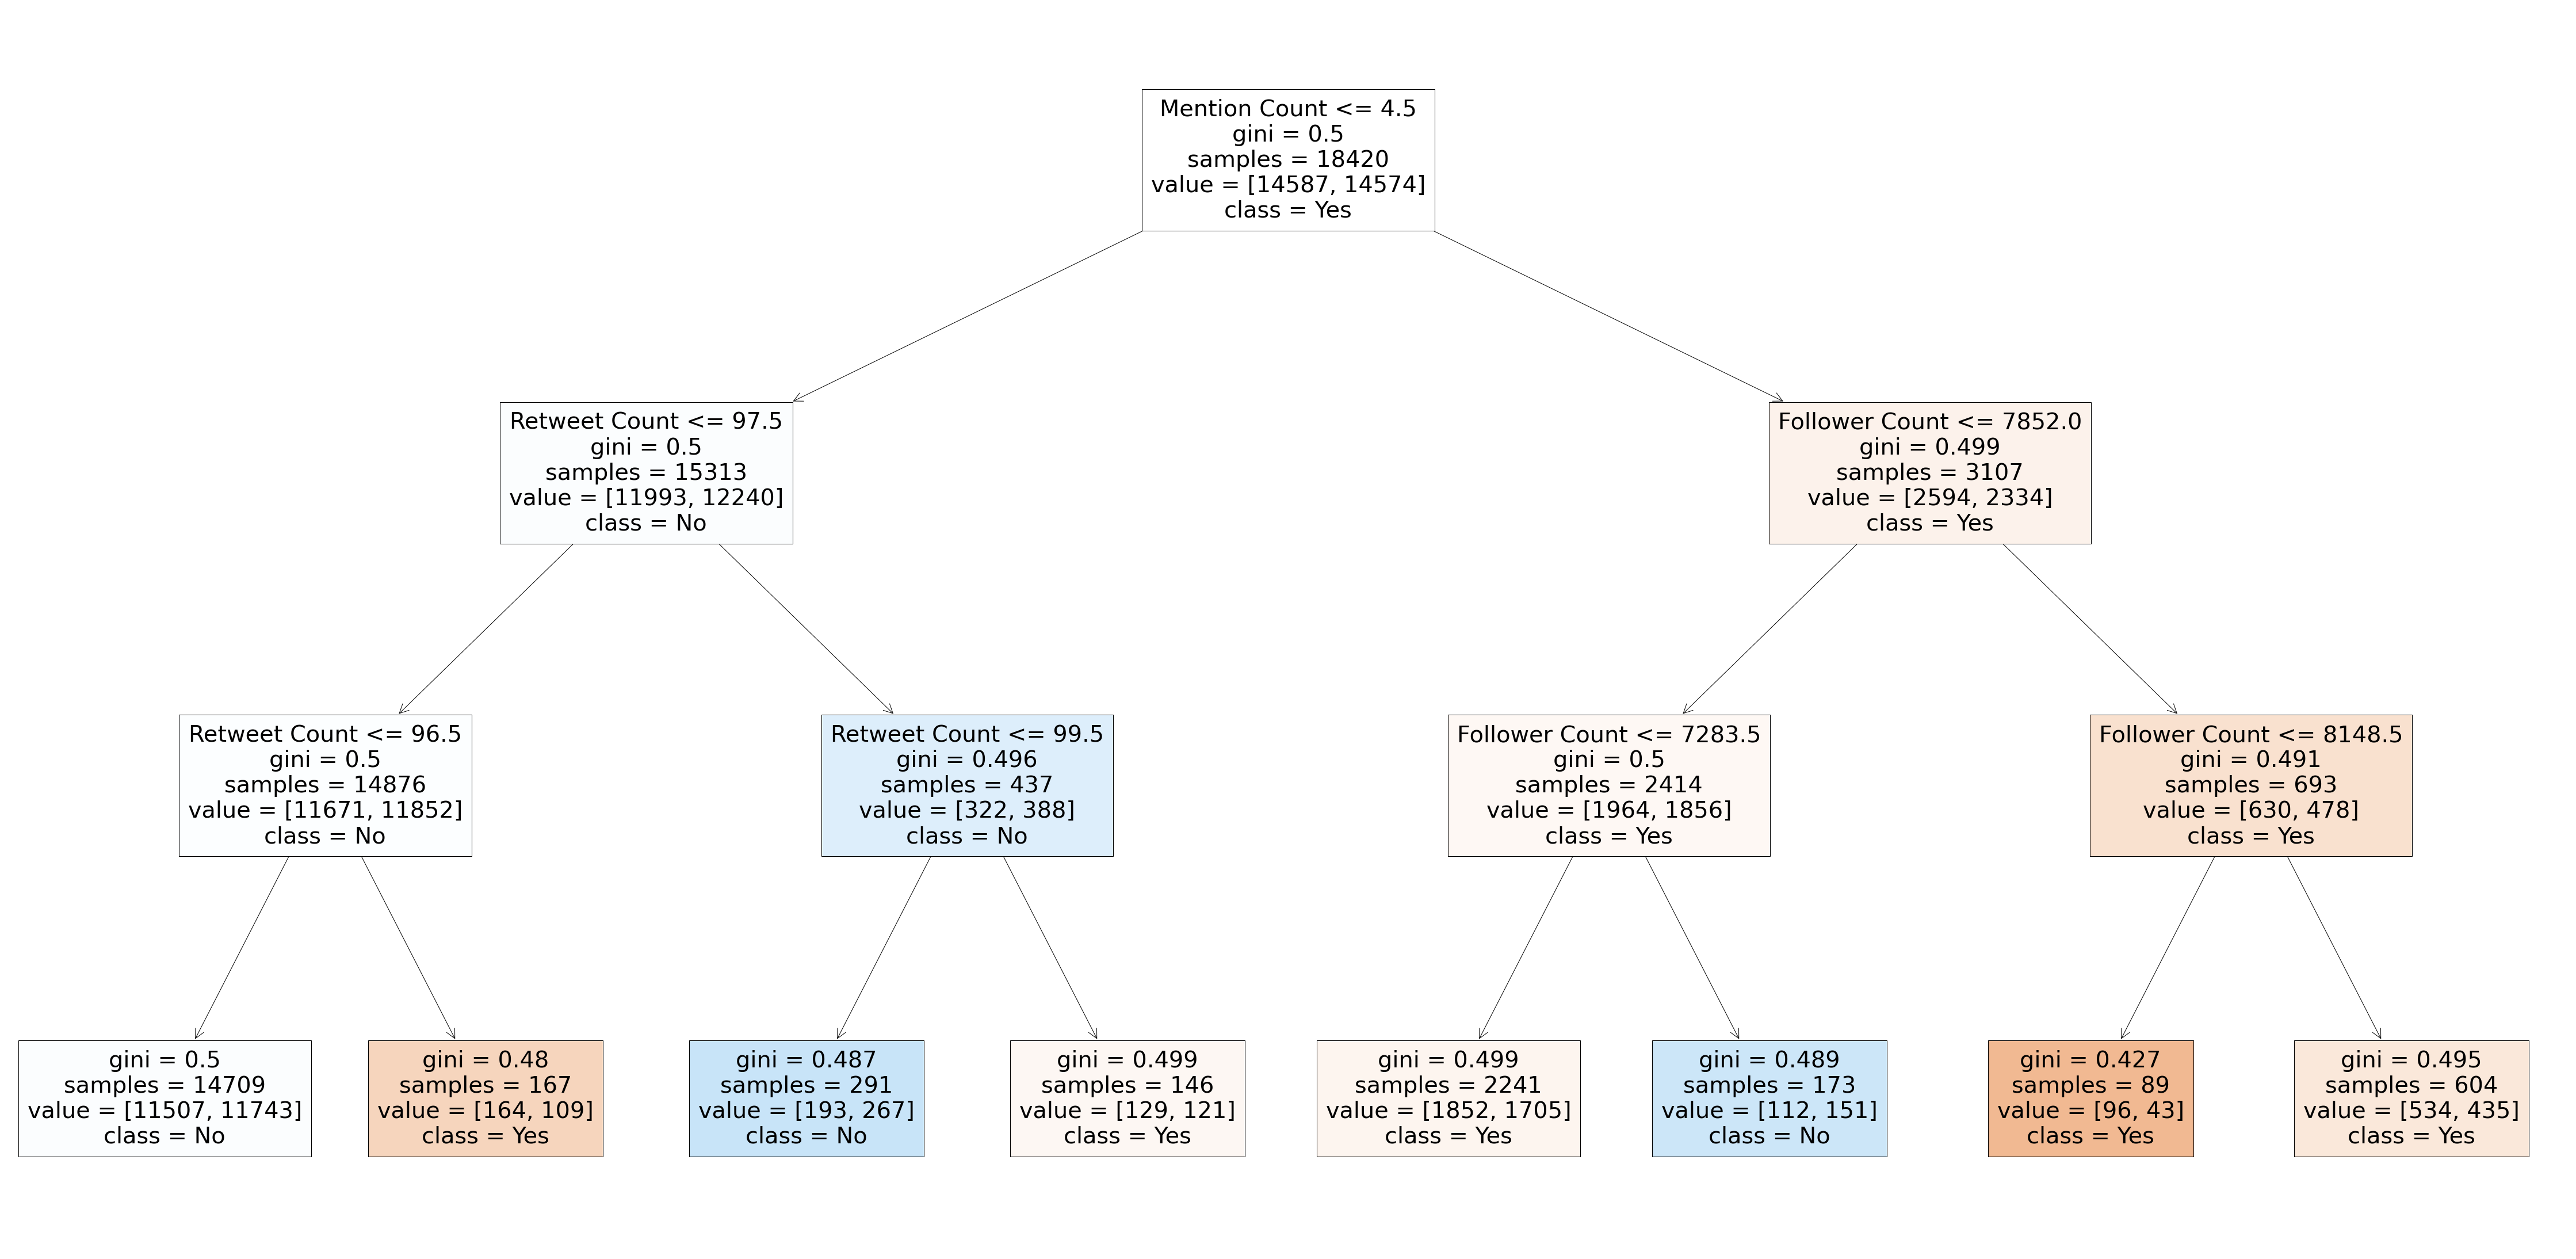

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)